# How to get upvotes for a kernel on Kaggle?

In [2]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import date manipulation
import datetime as dt
from datetime import date, timedelta

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# import plotly
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly import tools

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
#import machine learning
from sklearn.linear_model import LinearRegression
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

## Introduction

I have recently joined Kaggle and started to create public kernels. My kernels have a lot of views, but no upvotes. So I decided to analyze Meta Kaggle dataset to find out:
* Statistics for kernels, which have votes.
* How different factors affect the number of votes (for example, characteristics of the author, source dataset etc.)?
* And finally, make the recommendations on how to make the kernel useful, so other kagglers would cast upvotes.

## Import datasets related to kernels

In [117]:
#import datasets

kernels = pd.read_csv('../meta-kaggle/Kernels.csv')
kernel_lang = pd.read_csv('../meta-kaggle/KernelLanguages.csv')
kernel_tags = pd.read_csv('../meta-kaggle/KernelTags.csv')
kernel_votes = pd.read_csv('../meta-kaggle/KernelVotes.csv')
kernel_versions = pd.read_csv('../meta-kaggle/KernelVersions.csv')
kernel_competitions = pd.read_csv('../meta-kaggle/KernelVersionCompetitionSources.csv')
kernel_users = pd.read_csv('../meta-kaggle/Users.csv')
datasets = pd.read_csv('../meta-kaggle/Datasets.csv')
kernel_datasets = pd.read_csv('../meta-kaggle/KernelVersionDatasetSources.csv')
dataset_versions = pd.read_csv('../meta-kaggle/DatasetVersions.csv')
tags = pd.read_csv('../meta-kaggle/Tags.csv')
competitions = pd.read_csv('../meta-kaggle/Competitions.csv')

In [5]:
kernels.head()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
0,1,2505,205.0,NaN,NaN,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,NaN,NaN,26,0,0
1,2,3716,1748.0,NaN,26670.0,2.0,03/25/2015 18:31:07,04/16/2015,03/25/2015,False,rf-proximity,3.0,07/15/2016,7615,1,12
2,4,3716,41.0,NaN,NaN,9.0,03/25/2015 21:57:36,03/23/2018,03/25/2015,False,r-version,NaN,NaN,9,0,0
3,5,28963,19.0,NaN,NaN,13.0,03/25/2015 22:01:04,03/23/2018,03/25/2015,False,test1,NaN,NaN,9,0,0
4,6,3716,21.0,NaN,NaN,15.0,03/25/2015 22:19:00,03/23/2018,03/25/2015,False,are-icons-missing,NaN,NaN,7,0,0


In [6]:
kernel_lang

,Id,Name,DisplayName,IsNotebook
0,1,R,R,False
1,2,Python,Python,False
2,5,RMarkdown,R,False
3,8,IPython Notebook,Python,True
4,9,IPython Notebook HTML,Python,False
5,12,R Notebook HTML,R,False
6,13,R Notebook,R,True
7,14,Python Script - Interactive,Python,True
8,15,R Script - Interactive,R,True
9,16,RMarkdown - Interactive,R,True


In [7]:
kernel_tags.head()

,Id,KernelId,TagId
0,17667,1008233,13202
1,17910,1021185,13208
2,17913,1021185,13302
3,17912,1021185,13402
4,17911,1021185,13405


In [8]:
kernel_votes.head()

,Id,UserId,KernelVersionId,VoteDate
0,93706,1037042,958647,05/04/2017
1,109884,661531,958647,06/25/2017
2,73528,744730,958647,02/28/2017
3,73593,685015,958647,02/28/2017
4,73632,10475,958647,02/28/2017


In [9]:
kernel_versions.head()

,Id,KernelId,ParentKernelVersionId,KernelLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,IsChange,TotalLines,LinesInsertedFromPrevious,LinesChangedFromPrevious,LinesUnchangedFromPrevious,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes
0,1,1,NaN,1,2505,03/25/2015 18:25:32,1.0,hello,03/23/2018,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,2,NaN,1,3716,03/25/2015 18:31:07,1.0,RF Proximity,03/23/2018,True,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,2,NaN,1,3716,03/25/2015 18:51:15,2.0,RF Proximity,03/23/2018,True,79.0,0.0,0.0,80.0,NaN,NaN,NaN,NaN,0
3,9,4,NaN,1,3716,03/25/2015 21:57:36,1.0,R version,03/23/2018,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10,4,NaN,1,3716,03/25/2015 21:57:44,2.0,R version,03/23/2018,True,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,0


In [10]:
kernel_competitions.head()

,Id,KernelVersionId,SourceCompetitionId
0,967717,1013,4353
1,978507,1399,3936
2,929401,2024,4280
3,912296,2031,4280
4,905829,2717,4280


In [11]:
tags.head()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1000,NaN,general reference,general-reference,general reference,NaN,0,0,0
1,1100,1000.0,reference works,reference-works,general reference > reference works,NaN,0,0,0
2,1103,1100.0,biography,biography,general reference > reference works > biography,Who did what and when? This tag contains infor...,3,0,0
3,1104,1100.0,dictionaries,dictionaries,general reference > reference works > dictiona...,"A dictionary, sometimes known as a wordbook, i...",6,0,3
4,1106,1100.0,encyclopedias,encyclopedias,general reference > reference works > encyclop...,An encyclopedia is a reference work or compend...,1,0,0


In [12]:
competitions.head()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,1,NaN,04/07/2010 07:57:43,...,False,False,USD,1000.0,1,1.0,False,22,25,22
1,8910,blg-454e-term-project-competition,BLG 454E Term Project Competition,"ITU Computer and Informatics Faculty, BLG 454E...",InClass,24780.0,NaN,1,NaN,03/17/2018 19:08:56,...,False,False,NaN,0.0,0,0.0,False,29,65,658
2,8916,test-xx,test-xx,this is a test,InClass,24867.0,NaN,1,NaN,03/18/2018 11:52:38,...,False,False,NaN,0.0,0,0.0,False,0,0,7
3,8933,recsys-20181-cfmr,RecSys 2018/1: Collaborative Movie Recommendation,Predict users' ratings for movies,InClass,25077.0,NaN,1,NaN,03/19/2018 15:34:50,...,False,False,NaN,0.0,0,0.0,False,27,28,737
4,8970,predictive-modeling-nmims-competition,Predictive Modeling -NMIMS - Competition,PM Competition for NMIMS 5th Year BIA Students,InClass,25413.0,NaN,1,NaN,03/21/2018 09:34:20,...,False,False,NaN,0.0,0,0.0,False,15,44,123


In [13]:
kernel_users.head(3)

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,5
2,381,iguyon,Isabelle,01/29/2010,2


In [14]:
datasets.head(3)

,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,ReviewDate,FeatureDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels
0,6,1,NaN,12.0,2158.0,2158.0,762,2,07/18/2015 00:51:12,07/18/2015,NaN,02/05/2018,44943,3819,81,644
1,7,491632,491632.0,NaN,7.0,7.0,766,2,08/04/2015 23:59:00,08/04/2015,NaN,02/06/2018,63139,6084,193,609
2,8,495305,NaN,6.0,7142.0,7142.0,774,2,08/18/2015 21:53:00,08/18/2015,NaN,01/31/2018,27285,3066,88,91


In [15]:
kernel_datasets.head(3)

,Id,KernelVersionId,SourceDatasetVersionId
0,47358,127318,7
1,60214,127188,7
2,63858,127284,7


In [16]:
dataset_versions.head(3)

,Id,DatasetId,DatasourceVersionId,CreatorUserId,LicenseName,CreationDate,VersionNumber,Title,Slug,Subtitle,Description,VersionNotes,TotalCompressedBytes,TotalUncompressedBytes
0,4690,2818,4690,517249,CC0: Public Domain,10/05/2017 03:24:33,1.0,Allegheny County Crash Data,allegheny-county-crash-data,Crash incident reported to the police in Alleg...,### Content\n\nContains locations and informat...,Initial release,262779599.0,262779599.0
1,6198,3955,6198,1389049,CC0: Public Domain,11/04/2017 11:37:49,1.0,DateasetTEst,dateasettest,NaN,NaN,Initial release,0.0,0.0
2,6249,3996,6249,1287548,Other (specified in description),11/05/2017 01:44:04,1.0,Toyota Corolla (clean),toyota-corolla-clean,Finding ways to predict or classify car prices,### Content\nThis dataset is quite simple. Bel...,Initial release,0.0,0.0


## Explore statistics for kernel votes

### 1. Explore basic statistics for number of kernels

* How many kernels are there? 
* How many of them are public? 
* How many kernels have upvotes? 
* How many kernels have any medal?

In [5]:
total_kernels = len(kernels['Id'].unique())

print('Total number of kernels: {total_kernels}'.format(total_kernels = total_kernels))

Total number of kernels: 224279


In [6]:
total_public = len(kernels[pd.notnull(kernels['MadePublicDate'])])

print('Total number of public kernels: {total_public_kernels}'.format(total_public_kernels = total_public))

Total number of public kernels: 213180


In [7]:
total_upvoted = len(kernels[ kernels['TotalVotes'] > 0])

print('Total number of kernels with upvotes: {total_upvoted}'.format(total_upvoted = total_upvoted))

Total number of kernels with upvotes: 46353


In [8]:
total_awarded = len(kernels[np.isfinite(kernels['Medal'])])

print('Total number of kernels with any medal: {total_awarded}'.format(total_awarded = total_awarded))

Total number of kernels with any medal: 9070


In [9]:
total_no_upvotes = total_public - total_upvoted

print('Total number of public kernels with no upvotes: {total_no_upvotes}'.format(total_no_upvotes = total_no_upvotes))

Total number of public kernels with no upvotes: 166827


In [10]:
total_private = total_kernels - total_public

print('Total number of private kernels: {total_private}'.format(total_private = total_private))

Total number of private kernels: 11099


In [11]:
total_upvoted_not_awarded = total_upvoted - total_awarded

print('Total number of upvoted, but not awarded: {total_upvoted_not_awarded}'.format(total_upvoted_not_awarded = total_upvoted_not_awarded))

Total number of upvoted, but not awarded: 37283


Plot statistics for number of kernels:

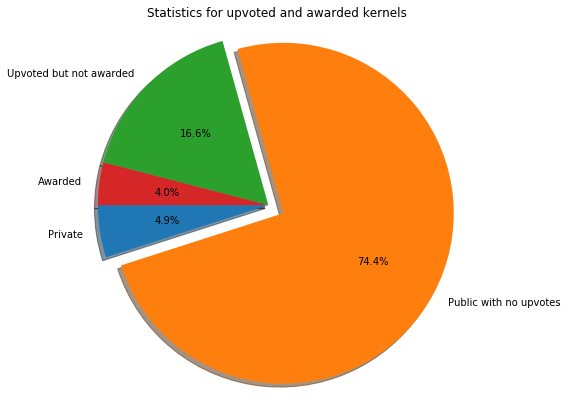

In [12]:
#plot statistics with matplotlib

labels = 'Private', 'Public with no upvotes', 'Upvoted but not awarded', 'Awarded'
sizes = [total_private, total_no_upvotes, total_upvoted_not_awarded, total_awarded]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.set_figheight(7)
fig1.set_figwidth(7)

plt.title('Statistics for upvoted and awarded kernels')

plt.show()

In [15]:
#plot statistics with plotly

labels = ['Private', 'Public with no upvotes', 'Upvoted but not awarded', 'Awarded']
values = [total_private, total_no_upvotes, total_upvoted_not_awarded, total_awarded]

colors = ['#7FDBE2', '#68B6AF', '#82C5A0', '#EED2BB']

trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

data = [trace]
layout = go.Layout(title='Statistics for upvoted and awarded kernels',
                  autosize=False,
                   width=600,
                   height=500,
                   margin=go.layout.Margin(
                      l=50,
                      r=50))

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### 2. How does number of views and number of comments affect number of votes?

* Is there a correlation between number of views and number of comments with number of votes?
* Plot dependencies between number of views, comments and number of votes.

Find out correlation between number of views, number of comments and number of votes:

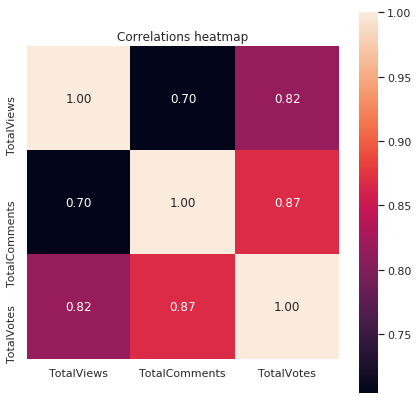

In [16]:
#columns to find out correlation
cols = ['TotalViews', 'TotalComments', 'TotalVotes']

#Find out correlation between columns and plot
corrs = np.corrcoef(kernels[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

We can see that votes, comments and views are __highly correlated__. So my first assumption would be that __we should get as many views of the kernels as possible to gain votes__.

Let's try to visualize dependency between views and votes:

In [70]:
#get average number of votes per number of views
votes_by_views = kernels.groupby('TotalViews').mean().reset_index()[['TotalViews', 'TotalVotes']]
votes_by_views = votes_by_views.sort_values(by = 'TotalViews', ascending = True)

# fit a linear regression model on views and votes data
model = LinearRegression()
model.fit(votes_by_views['TotalViews'].values.reshape(-1, 1), votes_by_views['TotalVotes'].values.reshape(-1, 1))

inputs = np.linspace(1, 1200000, num=50)
predictions = model.predict(inputs.reshape(-1,1)).reshape(50)

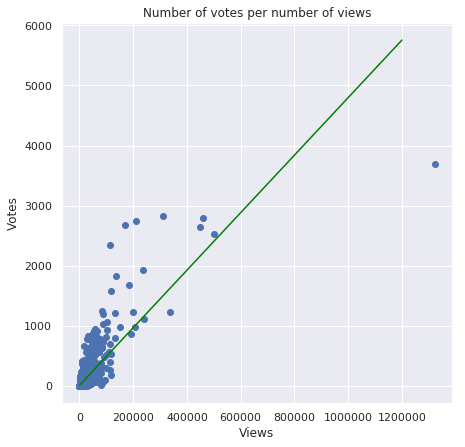

In [71]:
#plot with matplotlib along with predictions from the linear regression model

plt.scatter(votes_by_views['TotalViews'], votes_by_views['TotalVotes'])
plt.plot(inputs, predictions, color='green')

plt.title("Number of votes per number of views")
plt.xlabel("Views")
plt.ylabel("Votes")

plt.show()

In [72]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_views['TotalViews'], 
    y = votes_by_views['TotalVotes'],
    mode = 'markers',
    name = 'votes per views scatter',
    marker = dict(color = '#7FDBE2')
    #color = '#7FDBE2'
)

trace1 = go.Scatter(
    x = inputs,
    y = predictions,
    mode = 'lines',
    name = 'votes per views trendline',
    line=dict(width=4, color='#EED2BB')
)

data = [trace0, trace1]

layout = go.Layout(
    title='Number of votes per number of views',
    xaxis=dict(title='Views', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

Visualization of dependency between comments and votes:

In [73]:
#get average number of votes per number of comments
votes_by_comments = kernels.groupby('TotalComments').mean().reset_index()[['TotalComments', 'TotalVotes']]
votes_by_comments = votes_by_comments.sort_values(by = 'TotalComments', ascending = True)

# fit a linear regression model on comments and votes data
model = LinearRegression()
model.fit(votes_by_comments['TotalComments'].values.reshape(-1, 1), votes_by_comments['TotalVotes'].values.reshape(-1, 1))

inputs = np.linspace(1, 1000, num=50)
predictions = model.predict(inputs.reshape(-1,1)).reshape(50)

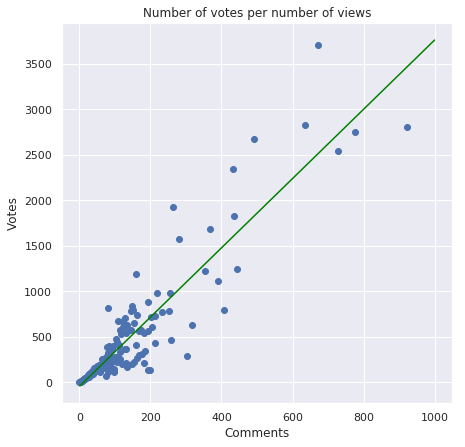

In [74]:
#plot with matplotlib along with predictions from the linear regression model

plt.scatter(votes_by_comments['TotalComments'], votes_by_comments['TotalVotes'])
plt.plot(inputs, predictions, color='green')

plt.title("Number of votes per number of views")
plt.xlabel("Comments")
plt.ylabel("Votes")

plt.show()

In [75]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_comments['TotalComments'], 
    y = votes_by_comments['TotalVotes'],
    mode = 'markers',
    name = 'votes per comments scatter',
    marker = dict(color = '#7FDBE2')
)

trace1 = go.Scatter(
    x = inputs,
    y = predictions,
    mode = 'lines',
    name = 'votes per comments trendline',
    line=dict(width=4, color='#EED2BB')
)

data = [trace0, trace1]

layout = go.Layout(
    title='Number of votes per number of comments',
    xaxis=dict(title='Comments', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

### 3. How does the status of the author affect number of votes per kernel?

I suppose that more active users and the users with higher visibility gain votes for kernels:
* So how does performance tier of the user affect the number of upvotes?

In [27]:
#merge kernels with users
kernel_users_renamed = kernel_users.rename(columns={'Id': 'AuthorUserId'})
kernels_user_tiers = kernels.merge(kernel_users_renamed, on = 'AuthorUserId')

In [28]:
kernels_user_tiers.head()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,2505,205.0,NaN,NaN,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,NaN,NaN,26,0,0,jeffmoser,Jeff Moser,08/21/2010,5
1,86,2505,2307564.0,NaN,NaN,548.0,04/03/2015 17:16:32,02/01/2018,04/03/2015,True,hi-python,3.0,09/16/2017,189,0,5,jeffmoser,Jeff Moser,08/21/2010,5
2,107,2505,740.0,NaN,NaN,632.0,04/06/2015 16:04:55,03/23/2018,04/06/2015,False,yet-another-python-sleep-test,NaN,NaN,4,0,0,jeffmoser,Jeff Moser,08/21/2010,5
3,108,2505,748.0,NaN,NaN,636.0,04/06/2015 16:12:14,03/23/2018,04/06/2015,False,more-python-testing,NaN,NaN,6,0,0,jeffmoser,Jeff Moser,08/21/2010,5
4,4345,2505,8879.0,NaN,NaN,8833.0,05/22/2015 14:36:27,05/22/2015,05/22/2015,False,kaggle-io-test,NaN,NaN,17,0,0,jeffmoser,Jeff Moser,08/21/2010,5


In [29]:
#get average number of votes per number of comments
votes_by_usertier= kernels_user_tiers.groupby('PerformanceTier').mean().reset_index()[['PerformanceTier', 'TotalVotes']]
votes_by_usertier = votes_by_usertier.sort_values(by = 'PerformanceTier', ascending = True)

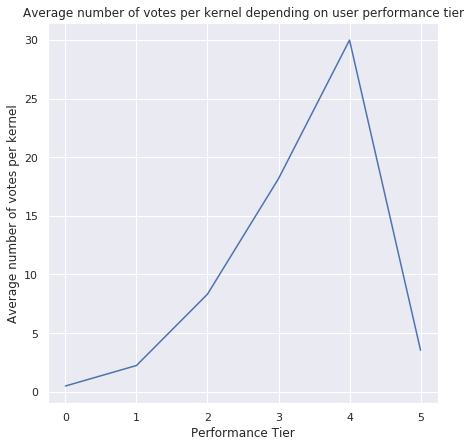

In [30]:
#plot with matplotlib along with predictions from the linear regression model

plt.plot(votes_by_usertier['PerformanceTier'], votes_by_usertier['TotalVotes'])

plt.title("Average number of votes per kernel depending on user performance tier")
plt.xlabel("Performance Tier")
plt.ylabel("Average number of votes per kernel")

plt.show()

In [31]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_usertier['PerformanceTier'], 
    y = votes_by_usertier['TotalVotes'],
    mode = 'lines',
    name = 'number of votes per kernel depending on user performance tier',
    line = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Average number of votes per kernel depending on user performance tier',
    xaxis=dict(title='Performance Tier', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Average number of votes per kernel', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

So we can really see that __more proficient users gain more votes for kernels__.

### 4. How does dataset related to kernel affects the number of votes?

I suppose that there might be some 'hot' datasets on Kaggle and kernels related to those datasets might optain more votes. So we should find out:
* How does the number of votes for a dataset affect the number of votes for related kernel?
* How does the number of downloads of a dataset affect the number of votes for related kernel?

In [32]:
#prepare data for the analysis

kernels_truncated = kernels[['Id' , 'CurrentKernelVersionId', 'TotalVotes']]
kernels_truncated = kernels_truncated.rename(columns={'Id': 'KernelId', 'TotalVotes':'TotalKernelVotes',
                                                      'CurrentKernelVersionId':'KernelVersionId'})

kernel_datasets_truncated = kernel_datasets[['KernelVersionId', 'SourceDatasetVersionId']]

dataset_versions_truncated = dataset_versions[['DatasetId', 'DatasourceVersionId']]
dataset_versions_truncated = dataset_versions_truncated.rename(columns={'DatasourceVersionId': 'SourceDatasetVersionId'})

datasets_truncated = datasets[['Id', 'TotalVotes', 'TotalDownloads']]
datasets_truncated = datasets_truncated.rename(columns={'Id': 'DatasetId', 'TotalVotes':'TotalDatasetVotes',
                                                      'TotalDownloads':'TotalDatasetDownloads'})

df_merge = kernels_truncated.merge(kernel_datasets_truncated, on = 'KernelVersionId')
df_merge = df_merge.merge(dataset_versions_truncated, on = 'SourceDatasetVersionId')
df_merge = df_merge.merge(datasets_truncated, on = 'DatasetId')

df_merge.head()

,KernelId,KernelVersionId,TotalKernelVotes,SourceDatasetVersionId,DatasetId,TotalDatasetVotes,TotalDatasetDownloads
0,9969,29938.0,0,2158,6,81,3819
1,10073,29837.0,3,2158,6,81,3819
2,10175,30288.0,5,2158,6,81,3819
3,10468,31521.0,12,2158,6,81,3819
4,10565,31860.0,0,2158,6,81,3819


At first let's look at correlations between TotalKernelVotes, TotalDatasetVotes and	TotalDatasetDownloads.

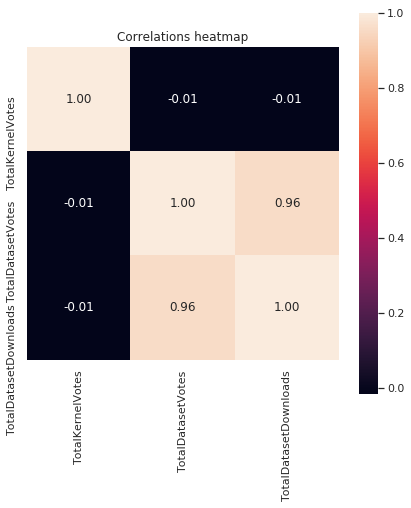

In [33]:
#columns to find out correlation
cols = ['TotalKernelVotes', 'TotalDatasetVotes', 'TotalDatasetDownloads']

#Find out correlation between columns and plot
corrs = np.corrcoef(df_merge[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

As we can see there is no correlation between number of kernel votes and number of votes or downloads for a dataset.
<br> Let's also make scatter plots:

In [34]:
#get average number of votes per number of dataset votes
votes_by_dvotes = df_merge.groupby('TotalDatasetVotes').mean().reset_index()[['TotalDatasetVotes', 'TotalKernelVotes']]
votes_by_dvotes = votes_by_dvotes.sort_values(by = 'TotalDatasetVotes', ascending = True)

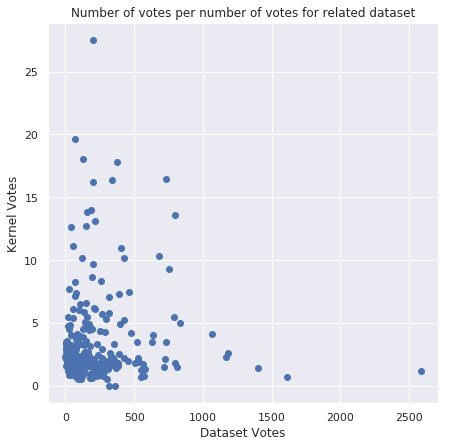

In [35]:
#plot with matplotlib

plt.scatter(votes_by_dvotes['TotalDatasetVotes'], votes_by_dvotes['TotalKernelVotes'])

plt.title("Number of votes per number of votes for related dataset")
plt.xlabel("Dataset Votes")
plt.ylabel("Kernel Votes")

plt.show()

In [36]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_dvotes['TotalDatasetVotes'], 
    y = votes_by_dvotes['TotalKernelVotes'],
    mode = 'markers',
    name = 'kernel votes per dataset votes',
    marker = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Number of votes per number of votes for related dataset',
    xaxis=dict(title='Dataset Votes', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Kernel Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

Here we can't see a clear dependency of kernel votes on dataset's number of votes. So I suppose that we can create a really helpful and popular kernel for an unpopular dataset and vice versa.

In [37]:
#get average number of votes per number of dataset downloads
votes_by_downloads = df_merge.groupby('TotalDatasetDownloads').mean().reset_index()[['TotalDatasetDownloads', 'TotalKernelVotes']]
votes_by_downloads = votes_by_downloads.sort_values(by = 'TotalDatasetDownloads', ascending = True)

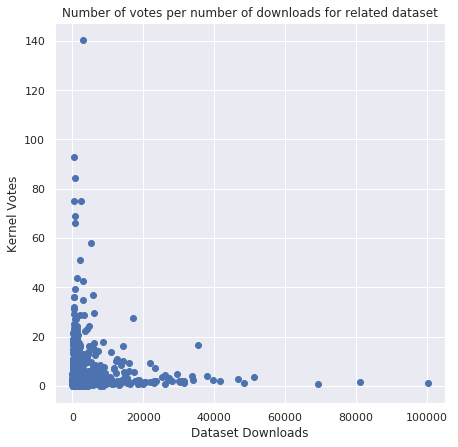

In [38]:
#plot with matplotlib

plt.scatter(votes_by_downloads['TotalDatasetDownloads'], votes_by_downloads['TotalKernelVotes'])

plt.title("Number of votes per number of downloads for related dataset")
plt.xlabel("Dataset Downloads")
plt.ylabel("Kernel Votes")

plt.show()

In [39]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_downloads['TotalDatasetDownloads'], 
    y = votes_by_downloads['TotalKernelVotes'],
    mode = 'markers',
    name = 'kernel votes per dataset downloads',
    marker = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Number of votes per number of downloads for related dataset',
    xaxis=dict(title='Dataset Downloads', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Kernel Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

The picture looks similar to the previous one. There is also no clear dependency.

### 6. How does kernel language affect the number of votes?

What kernel types gain more votes?

In [40]:
#prepare the data for the analysis

kernels_trc = kernels[['Id' , 'TotalVotes', 'CurrentKernelVersionId']]
kernels_trc = kernels_trc.rename(columns = {'Id': 'KernelId', 'CurrentKernelVersionId' : 'VersionId'})

kernel_versions_trc = kernel_versions[['Id', 'KernelId', 'KernelLanguageId']]
kernel_versions_trc = kernel_versions_trc.rename(columns = {'Id' : 'VersionId'})

kernel_lang_ren = kernel_lang.rename(columns = {'Id' : 'KernelLanguageId'})

kernels_trc_lang = kernels_trc.merge(kernel_versions_trc, on = ['VersionId', 'KernelId'])
kernels_trc_lang = kernels_trc_lang.merge(kernel_lang_ren, on = 'KernelLanguageId')

kernels_trc_lang.head()

,KernelId,TotalVotes,VersionId,KernelLanguageId,Name,DisplayName,IsNotebook
0,1,0,205.0,1,R,R,False
1,2,12,1748.0,1,R,R,False
2,4,0,41.0,1,R,R,False
3,5,0,19.0,1,R,R,False
4,6,0,21.0,1,R,R,False


In [41]:
#get average number of votes per language name
votes_by_lang = kernels_trc_lang.groupby('Name').mean().reset_index()[['Name', 'TotalVotes']]
votes_by_lang = votes_by_lang.sort_values(by = 'Name', ascending = True)
votes_by_lang = votes_by_lang.rename(columns = {'TotalVotes' : 'Average Votes'})

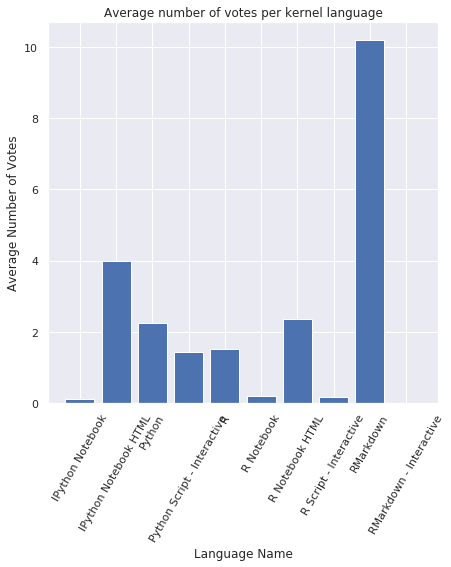

In [42]:
#plot bar chart with matplotlib

plt.bar(votes_by_lang['Name'], votes_by_lang['Average Votes'])
plt.xticks(votes_by_lang['Name'])
plt.xticks(rotation=60)

plt.xlabel('Language Name')
plt.ylabel('Average Number of Votes')

plt.title('Average number of votes per kernel language')

plt.show()

In [43]:
#plot bar chart with plotly

trace1 = go.Bar(
    x = votes_by_lang['Name'], 
    y = votes_by_lang['Average Votes'],
    name='Average number of votes per kernel language',
    marker=dict(color='#68B6AF')
)

data = [trace1]

layout = go.Layout(title='Average number of votes per kernel language')

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

It seems that notebooks are more appreciated with Kaggle users. 

### 7. How do kernel tags affect the number of votes?

Now we will look at the kernels' tags:
* Are there any kernel tags, which are more specific to more popular kernels?

In [44]:
#prepare data

kernels_trc_tag = kernels[['Id' , 'TotalVotes']]
kernels_trc_tag = kernels_trc_tag.rename(columns = {'Id' : 'KernelId'})

tags_trc = tags[['Id', 'Name', 'DatasetCount', 'CompetitionCount', 'KernelCount']]
tags_trc = tags_trc.rename(columns = {'Id' : 'TagId'})

kernels_trc_tag = kernels_trc_tag.merge(kernel_tags[['KernelId', 'TagId']], on='KernelId')
kernels_trc_tag = kernels_trc_tag.merge(tags_trc, on = 'TagId')

kernels_trc_tag.head(3)

,KernelId,TotalVotes,TagId,Name,DatasetCount,CompetitionCount,KernelCount
0,541,35,13101,tutorial,19,1,2783
1,29004,565,13101,tutorial,19,1,2783
2,44675,2802,13101,tutorial,19,1,2783


I have an assumption that Kaggle users may be attracted by most popular tags, so using them will help to gain more votes. That is why I will try to plot average number of votes against number of datasets/competitions/kernels, where kernel tag is used.

1. Tag usage for datasets:

In [45]:
#get average number of votes per number of tage usages in datasets
votes_by_tag_dataset = kernels_trc_tag.groupby('DatasetCount').mean().reset_index()[['DatasetCount', 'TotalVotes']]
votes_by_tag_dataset = votes_by_tag_dataset.sort_values(by = 'DatasetCount', ascending = True)

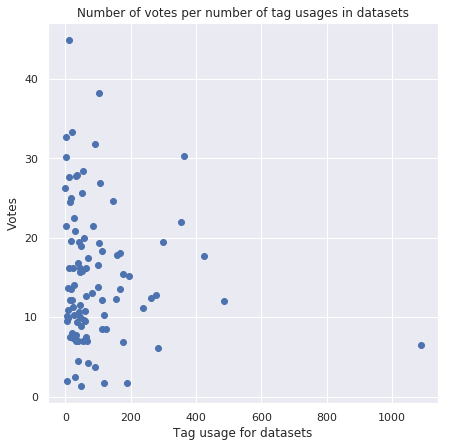

In [46]:
#plot with matplotlib

plt.scatter(votes_by_tag_dataset['DatasetCount'], votes_by_tag_dataset['TotalVotes'])
plt.title("Number of votes per number of tag usages in datasets")
plt.xlabel("Tag usage for datasets")
plt.ylabel("Votes")

plt.show()

In [47]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_tag_dataset['DatasetCount'], 
    y = votes_by_tag_dataset['TotalVotes'],
    mode = 'markers',
    name = 'votes per tag usages in datasets',
    marker = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Number of votes per number of tag usages in datasets',
    xaxis=dict(title='Tag usage for datasets', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

1. Tag usage for competitions:

In [48]:
#get average number of votes per number of tage usages in competitions
votes_by_tag_competition = kernels_trc_tag.groupby('CompetitionCount').mean().reset_index()[['CompetitionCount', 'TotalVotes']]
votes_by_tag_competition = votes_by_tag_competition.sort_values(by = 'CompetitionCount', ascending = True)

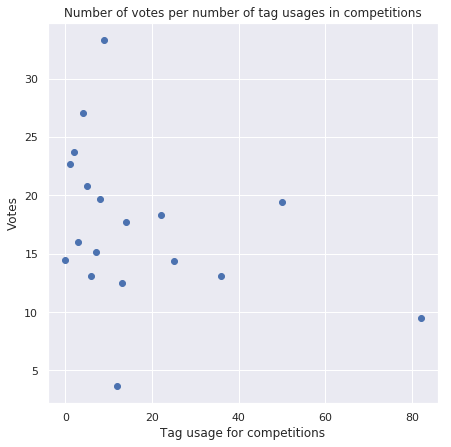

In [49]:
#plot with matplotlib

plt.scatter(votes_by_tag_competition['CompetitionCount'], votes_by_tag_competition['TotalVotes'])
plt.title("Number of votes per number of tag usages in competitions")
plt.xlabel("Tag usage for competitions")
plt.ylabel("Votes")

plt.show()

In [50]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_tag_competition ['CompetitionCount'], 
    y = votes_by_tag_competition ['TotalVotes'],
    mode = 'markers',
    name = 'votes per tag usages in competitions',
    marker = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Number of votes per number of tag usages in competitions',
    xaxis=dict(title='Tag usage for competitions', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

3. Tag usage for kernels:

In [51]:
#get average number of votes per number of tage usages in datasets
votes_by_tag_kernel = kernels_trc_tag.groupby('KernelCount').mean().reset_index()[['KernelCount', 'TotalVotes']]
votes_by_tag_kernel = votes_by_tag_kernel.sort_values(by = 'KernelCount', ascending = True)

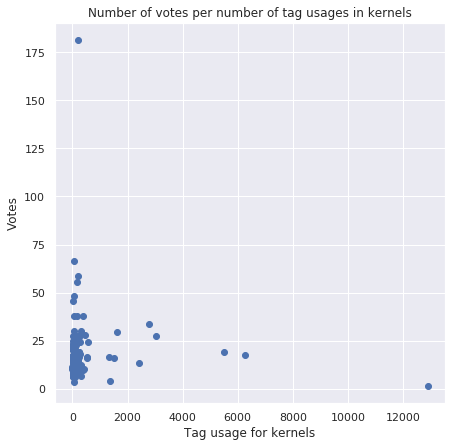

In [52]:
#plot with matplotlib

plt.scatter(votes_by_tag_kernel['KernelCount'], votes_by_tag_kernel['TotalVotes'])
plt.title("Number of votes per number of tag usages in kernels")
plt.xlabel("Tag usage for kernels")
plt.ylabel("Votes")

plt.show()

In [53]:
#plot with plotly

# Create traces
trace0 = go.Scatter(
    x = votes_by_tag_kernel['KernelCount'], 
    y = votes_by_tag_kernel['TotalVotes'],
    mode = 'markers',
    name = 'votes per tag usages in kernels',
    marker = dict(color = '#7FDBE2')
)

data = [trace0]

layout = go.Layout(
    title='Number of votes per number of tag usages in kernels',
    xaxis=dict(title='Tag usage for kernels', ticklen=5, zeroline=False, gridwidth=2),
    yaxis=dict(title='Votes', ticklen=5, gridwidth=2),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

Looks like the popularity of the tag doesn't really affect the number of votes.
<br> I would also like to look at average number of votes for the most popular tags:

In [54]:
#find out total usage of the tag and store in TotalCount column
tags_total = tags_trc.copy()

tags_total['TotalCount'] = tags_total['DatasetCount'] + tags_total['CompetitionCount'] + tags_total['KernelCount']

tags_total.head()

,TagId,Name,DatasetCount,CompetitionCount,KernelCount,TotalCount
0,1000,general reference,0,0,0,0
1,1100,reference works,0,0,0,0
2,1103,biography,3,0,0,3
3,1104,dictionaries,6,0,3,9
4,1106,encyclopedias,1,0,0,1


In [55]:
#find out top-20 most popular tags
tags_total = tags_total.sort_values('TotalCount', ascending = False)
tags_total = tags_total[:20]

tags_total

,TagId,Name,DatasetCount,CompetitionCount,KernelCount,TotalCount
574,16003,starter code,4,0,12890,12894
480,13102,beginner,70,0,6247,6317
493,13208,data visualization,103,0,5511,5614
486,13201,eda,33,0,3037,3070
479,13101,tutorial,19,1,2783,2803
504,13302,classification,167,1,2404,2572
508,13306,feature engineering,34,0,1636,1670
487,13202,data cleaning,43,0,1500,1543
512,13310,deep learning,99,0,1343,1442
568,15001,dailychallenge,0,0,1362,1362


In [56]:
#find average number of votes for each tag
votes_by_tag = kernels_trc_tag.groupby('Name').mean().reset_index()[['Name', 'TotalVotes']]

#filter votes by tag for only top-20 most popular tags
votes_by_tag_popular = votes_by_tag[votes_by_tag['Name'].isin(tags_total['Name'].values.tolist())]

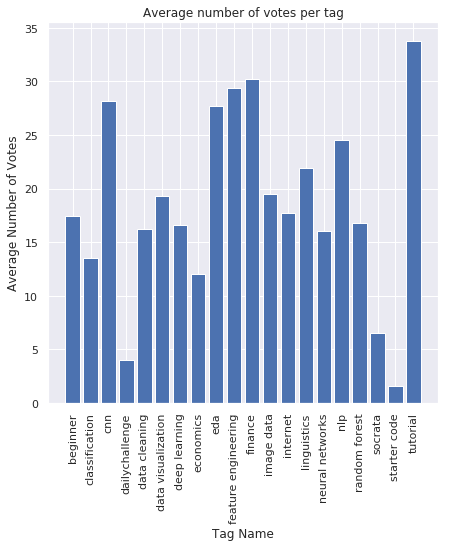

In [57]:
#plot bar chart with matplotlib

plt.bar(votes_by_tag_popular['Name'], votes_by_tag_popular['TotalVotes'])
plt.xticks(votes_by_tag_popular['Name'])
plt.xticks(rotation=90)

plt.xlabel('Tag Name')
plt.ylabel('Average Number of Votes')

plt.title('Average number of votes per tag')

plt.show()

In [58]:
#plot bar chart with plotly

trace1 = go.Bar(
    x = votes_by_tag_popular['Name'], 
    y = votes_by_tag_popular['TotalVotes'],
    name='Average number of votes per tag',
    marker=dict(color='#68B6AF')
)

data = [trace1]

layout = go.Layout(title='Average number of votes per tag')

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

We can really see that number of votes varies greatly even for the most popular tags.

It is also interesting to find out tags, which have the greatest average number of votes:

In [59]:
#sort votes_by_tag by average number of votes and take top-20

votes_by_tag_aver = votes_by_tag.sort_values('TotalVotes', ascending = False)[:20]

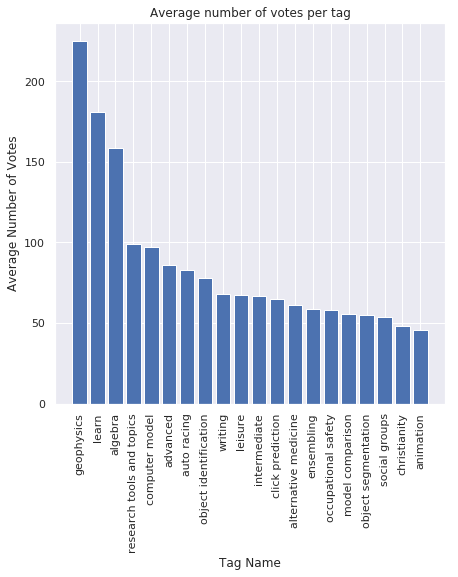

In [60]:
#plot bar chart with matplotlib

plt.bar(votes_by_tag_aver['Name'], votes_by_tag_aver['TotalVotes'])
plt.xticks(votes_by_tag_aver['Name'])
plt.xticks(rotation=90)

plt.xlabel('Tag Name')
plt.ylabel('Average Number of Votes')

plt.title('Average number of votes per tag')

plt.show()

In [61]:
#plot bar chart with plotly

trace1 = go.Bar(
    x = votes_by_tag_aver['Name'], 
    y = votes_by_tag_aver['TotalVotes'],
    name='Average number of votes per tag',
    marker=dict(color='#68B6AF')
)

data = [trace1]

layout = go.Layout(title='Average number of votes per tag')

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

We can see that tags with the greatest average number of votes don't really match with the most popular tags, so I guess my assumption that using popular tags in kernels will help to gain more votes is wrong.

## Machine learning to predict number of votes for kernel

The last thing left to do is to try to create regression model, which predicts the number of votes for a kernel.

In [174]:
#prepare data

def has_tag(row, tag):
    ''' Function returns 1 of tag id found in row['Tags'] column '''
    
    for row_tag in row['Tags'].replace(' ','').replace('{','').replace('}','').split(','):
        if row_tag == tag:
            return 1
    return 0

def is_forked(row):
    ''' Functions returns 0 if row['ForkParentKernelVersionId'] is nan, 1 - otherwise '''
    if np.isnan(row['ForkParentKernelVersionId']):
        return 0
    else:
        return 1

def has_linked_topic(row):
    ''' Functions returns 0 if row['ForumTopicId'] is nan, 1 - otherwise '''
    if np.isnan(row['ForumTopicId']):
        return 0
    else:
        return 1
    
def get_days_from_registration(row):
    '''Function returns number of days since users registration date'''
    
    today = dt.datetime.now().date()
    days = (today - dt.datetime.strptime(row['RegisterDate'], "%m/%d/%Y").date()).days
    
    return days

def get_days_from_kernel_creation(row):
    '''Function returns number of days since kernel creation date'''
    
    today = dt.datetime.now().date()
    
    days = (today - dt.datetime.strptime(row['CreationDate'], "%m/%d/%Y %H:%M:%S").date()).days
    
    return days

def prepare_data(kernels, kernel_lang, kernel_tags, kernel_versions, kernel_users, kernel_datasets, datasets, dataset_versions, tags, competitions, kernel_competitions):
    '''
    Function to prepare meta Kaggle data to be used in regression models
    
    INPUTS:
    1. kernels - Kernels.csv dataset, 
    2. kernel_lang - KernelLanguages.csv dataset,
    3. kernel_tags - KernelTags.csv dataset,
    4. kernel_versions - KernelVersions.csv dataset,
    5. kernel_users - KernelUsers.csv dataset,
    6. kernel_datasets - KernelVersionDatasetSources.csv dataset,
    7. datasets - Datasets.csv dataset,
    8. dataset_versions - DatasetVersions.csv dataset,
    9. tags - Tags.csv dataset.
    10. competitions - KernelVersionCompetitionSources.csv dataset.
    11. kernel_competitions - Competitions.csv dataset. 
    
    RETURNS:
    df - dataset, wchich contains preprocessed data
    '''
    #1. merge datasets
    
    #remove irrelevant columns from dataset and rename other columns to perform merge
    df = kernels[['Id', 'CurrentKernelVersionId' , 'ForkParentKernelVersionId', 'ForumTopicId', 'TotalVotes', 'AuthorUserId', 'CreationDate']].rename(columns = 
                                                                                                                      {'Id': 'KernelId', 
                                                                                                           'TotalVotes': 'TotalKernelVotes', 
                                                                                                                      'CurrentKernelVersionId':'KernelVersionId'})
    # create new column for age of the kernel (number of days since the kernel creation)
    # and drop old column CreationDate
    df[['CreationDate']] = df[['CreationDate']].fillna(value=dt.datetime.now().strftime('%m/%d/%Y %H:%M:%S'))
    df['KernelAge'] = df.apply(lambda row: get_days_from_kernel_creation(row),axis=1)
    df = df.drop('CreationDate', axis = 1)
    
    
    #merge with users to add PerformanceTier of the author
    kernel_users['DaysSinceRegistration'] = kernel_users.apply(lambda row: get_days_from_registration(row),axis=1)
    kernel_users_renamed = kernel_users[['Id', 'PerformanceTier', 'DaysSinceRegistration']].rename(columns={'Id': 'AuthorUserId',
                                                                                  'PerformanceTier' : 'AuthorPerformanceTier'})
    df = df.merge(kernel_users_renamed, on = 'AuthorUserId').drop('AuthorUserId', axis = 1)
    
    #merge with versions to add VersionNumber and KernelLanguageId
    kernel_versions_renamed = kernel_versions[['Id', 'KernelId', 'KernelLanguageId', 'VersionNumber']].rename(columns = {'Id':'KernelVersionId'})
    df = df.merge(kernel_versions_renamed, on = ['KernelVersionId', 'KernelId'])
    
    #merge with datasets to add TotalDatasetVotes and TotalDatasetDownloads
    kernel_datasets_truncated = kernel_datasets[['KernelVersionId', 'SourceDatasetVersionId']]

    dataset_versions_truncated = dataset_versions[['DatasetId', 'DatasourceVersionId']]
    dataset_versions_truncated = dataset_versions_truncated.rename(columns={'DatasourceVersionId': 'SourceDatasetVersionId'})

    datasets_truncated = datasets[['Id', 'TotalVotes', 'TotalDownloads']]
    datasets_truncated = datasets_truncated.rename(columns={'Id': 'DatasetId', 'TotalVotes':'TotalDatasetVotes',
                                                      'TotalDownloads':'TotalDatasetDownloads'})

    df = df.merge(kernel_datasets_truncated, on = 'KernelVersionId')
    df = df.merge(dataset_versions_truncated, on = 'SourceDatasetVersionId')
    df = df.merge(datasets_truncated, on = 'DatasetId').drop(['SourceDatasetVersionId', 'DatasetId'], axis = 1)
    
    # merge with type of competition
    # if kernel is not linked to a competition - NaN
    competitions_type = competitions[['Id', 'HostSegmentTitle']].rename(columns={'Id': 'SourceCompetitionId'})
    kernel_competition_type = kernel_competitions.merge(competitions_type, on='SourceCompetitionId')[['KernelVersionId', 'HostSegmentTitle']] # merge kernel versions with competitions
    df = df.merge(kernel_competition_type, on = 'KernelVersionId', how='outer')
    df = df.drop('KernelVersionId', axis = 1)
    
    #create dummy variables for competition types and drop HostSegmentTitle
    df = pd.get_dummies(df, columns = ['HostSegmentTitle'], prefix = 'comp', dummy_na = True)
    
    #merge with tags
    tags_trc = tags[['Id', 'Name']]
    tags_trc = tags_trc.rename(columns = {'Id' : 'TagId', 'Name' : 'TagName'})
    df = df.merge(kernel_tags, on = 'KernelId').drop(['Id'], axis = 1)
    df = df.merge(tags_trc, on = 'TagId')
    
    #find most popular tags
    top20_tags = tags[['Id', 'Name', 'DatasetCount', 'CompetitionCount', 'KernelCount']].rename(columns={'Id':'TagId'})
    top20_tags['TotalCount'] = top20_tags['DatasetCount'] + top20_tags['CompetitionCount'] + top20_tags['KernelCount']
    top20_tags = top20_tags.sort_values('TotalCount', ascending = False)
    top20_tags = top20_tags[:20].drop(['DatasetCount', 'CompetitionCount' , 'KernelCount'], axis = 1)
    
    #filter-out rows only for most popular tags
    df = df[df['TagId'].isin(top20_tags['TagId'].values.tolist())]
    df = df.drop('TagId', axis = 1)
    
    #introduce column 'Tags' with set of most popular tags used for kernel
    df_1 = df.groupby('KernelId')['TagName'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index().rename(columns = {'TagName':'Tags'})
    df = df.drop('TagName', axis = 1)
    df = df_1.merge(df, on='KernelId')
    
    #create dummy columns for top-20 tags
    for top20_tag in top20_tags['Name'].values.tolist():
        df['tag_' + str(top20_tag)] = df.apply(lambda row: has_tag(row, top20_tag),axis=1)
        
    df = df.drop('Tags', axis = 1)
    
    #2. process column values
    
    #introduce column IsForked for kernels forked from other and drop original column
    df['IsForked'] = df.apply(lambda row: is_forked(row),axis=1)
    df = df.drop('ForkParentKernelVersionId', axis = 1)
    
    #introduce colum HasForumTopic for kernels linked to forum topic id and drop original column
    df['HasForumTopic'] = df.apply(lambda row: has_linked_topic(row),axis=1)
    df = df.drop(['ForumTopicId', 'KernelId'], axis = 1)
    
    return df

df = prepare_data(kernels, kernel_lang, kernel_tags, kernel_versions, kernel_users, kernel_datasets, datasets, dataset_versions, tags, competitions, kernel_competitions)

df.head(5)

,TotalKernelVotes,KernelAge,AuthorPerformanceTier,DaysSinceRegistration,KernelLanguageId,VersionNumber,TotalDatasetVotes,TotalDatasetDownloads,comp_Featured,comp_Getting Started,...,tag_nlp,tag_internet,tag_image data,tag_neural networks,tag_random forest,tag_economics,tag_cnn,tag_linguistics,IsForked,HasForumTopic
0,13.0,1359.0,2.0,2430.0,7.0,31.0,193.0,6084.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,11.0,1358.0,1.0,1375.0,1.0,30.0,193.0,6084.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,11.0,1355.0,0.0,1360.0,2.0,38.0,193.0,6084.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,13.0,1330.0,3.0,1751.0,2.0,7.0,193.0,6084.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,9.0,1327.0,0.0,1612.0,2.0,53.0,193.0,6084.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [175]:
#split into train and test
TEST_SIZE = 0.3
RAND_STATE = 42

X = df.drop(columns = 'TotalKernelVotes')
y = df[['TotalKernelVotes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [176]:
#train XGBoost model
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

MSE train: 138.181, test: 338.051
R^2 train: 0.960, test: 0.928


As we see R^2 score is not bad. So now we can try to predict, how many votes will score __[one of my recent kernels](https://www.kaggle.com/aleksandradeis/bank-marketing-analysis)__:

Let's see feature importances:

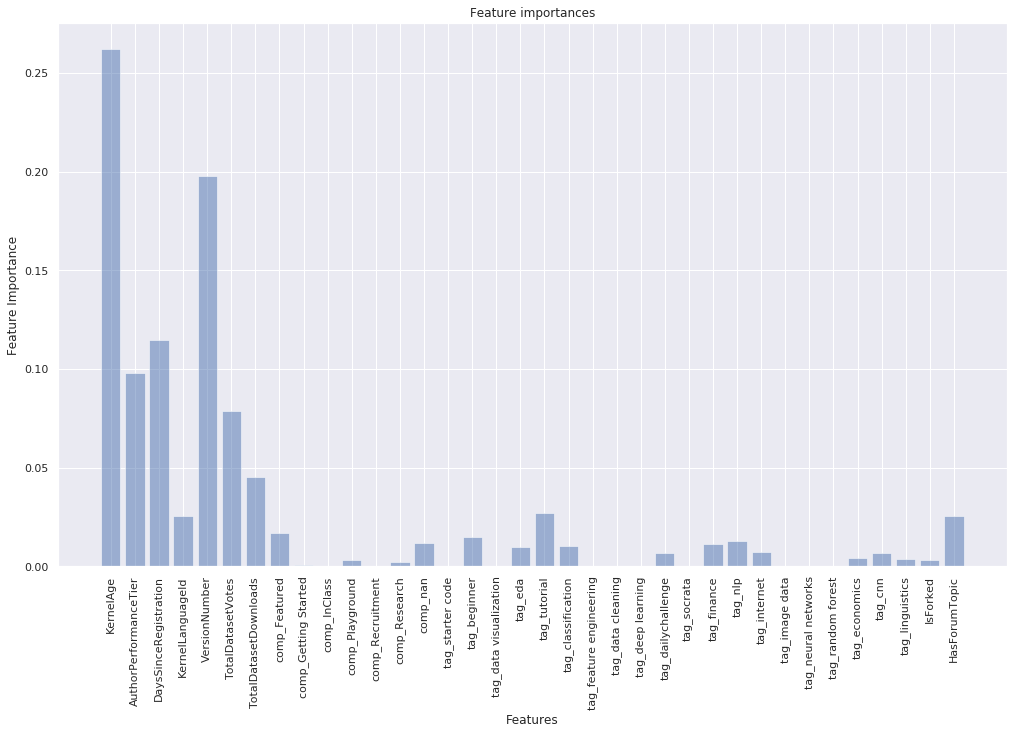

In [177]:
#plot bar chart with matplotlib
plt.figure(figsize=(17,10))

y_pos = np.arange(len(X.columns))

plt.bar(y_pos, xgb.feature_importances_, align='center', alpha=0.5)
plt.xticks(y_pos, X.columns)
plt.xticks(rotation=90)

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title('Feature importances')

plt.show()

As we see the most important features are:
* __Kernel age__: this feature is so essential because kernels don't gain the votes in one day, the users upvote kernels gradually after the publication,
* __Kernel version number__: this feature may be related to the kernel quality, the kernel with lot's of versions may be updated and improved,
* __Number of days since the author has registered on Kaggle__ and __The performance tier of the author__: more experienced authors may create better kernels,
* __Number of votes and downloads for the related dataset__: probably kernels related to the more popular datasets get more views and more votes as a result.

In [178]:
data = np.array([30, 2, 365, 8, 1, 30, 2070, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
columns = X_train.columns.values

bm_kernel = pd.DataFrame(data = [data], columns = columns)

In [179]:
predict_votes = xgb.predict(bm_kernel)
predict_votes

array([1.6352097], dtype=float32)

The model used to predict around 2 votes for this dataframe. After some enhancements top the features, it predicts only 1 vote. 
<br> That's sad. Well, I'm still hopeful :)

## Conclusion

In conclusion, I would like to summarize all the findings and recommendations from this analysis:

1. __It is hard to create a really helpful kernel, which will be appreciated and upvoted by Kagglers__: only 20% of kernels have upvotes and only 4% of kernels have awards (have more than 5 upvotes).
2. __Views and comments bring upvotes__: consider adding a captivating title to the kernel and sharing the link to the kernel with others, the more people will view the kernel - the more people will find it useful.
3. __Active authors have more votes__: try to be an active author and gain visibility, experience in writing kernels and feedback from the others will eventually help to get votes.
4. __It doesn't really matter what topic the kernel is related to, but it matters how the kernel material is presented__: notebooks tend to be more appreciated by Kagglers.